# **Polynomial Regression**

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Y dataset')

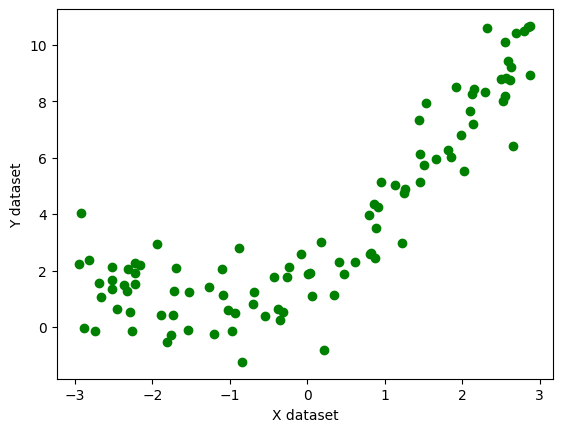

In [195]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

# Non Linear Relationship

In [196]:
X

array([[-2.81708404],
       [-1.75507359],
       [ 0.34607701],
       [-2.5247001 ],
       [ 2.80204554],
       [-2.22358805],
       [-2.9432579 ],
       [ 2.55729791],
       [ 0.0656359 ],
       [-1.7184064 ],
       [-2.51995953],
       [ 2.56671643],
       [-1.74050939],
       [ 1.45179943],
       [ 0.0375371 ],
       [-2.22447787],
       [ 2.52711019],
       [-0.70458894],
       [ 0.47214186],
       [-2.28886245],
       [ 0.80556085],
       [ 0.41176489],
       [ 2.28880927],
       [ 1.53004176],
       [ 0.88896658],
       [ 2.65686704],
       [-0.84248952],
       [-1.27368452],
       [-1.81237197],
       [ 1.25559171],
       [ 2.62190254],
       [ 0.91404773],
       [-2.16150104],
       [ 2.31758839],
       [ 1.91678849],
       [ 0.00712751],
       [ 1.82234286],
       [ 0.82783275],
       [-2.22092938],
       [ 2.59499598],
       [-0.37709752],
       [-2.88650387],
       [-2.68637398],
       [-2.32759867],
       [-1.88708243],
       [-0

In [197]:
y

array([[ 2.36735036],
       [-0.26807133],
       [ 1.12137237],
       [ 2.13706465],
       [10.4929155 ],
       [ 1.514015  ],
       [ 2.2296936 ],
       [ 8.16798018],
       [ 1.11003457],
       [ 1.27228145],
       [ 1.66784486],
       [ 8.82807198],
       [ 0.41267356],
       [ 5.14566875],
       [ 1.92593157],
       [ 1.89647561],
       [ 8.00035744],
       [ 0.82826092],
       [ 1.87883152],
       [ 0.51902247],
       [ 2.59089884],
       [ 2.30592298],
       [ 8.30920802],
       [ 7.9536524 ],
       [ 3.50720983],
       [ 6.42994346],
       [-1.23871218],
       [ 1.40861293],
       [-0.54924432],
       [ 4.89609006],
       [ 8.75183831],
       [ 4.23693549],
       [ 2.17880882],
       [10.60125911],
       [ 8.49072745],
       [ 1.88461986],
       [ 6.2847918 ],
       [ 2.63453203],
       [ 2.27643644],
       [ 9.41057197],
       [ 0.62640197],
       [-0.02836885],
       [ 1.5576626 ],
       [ 1.25813339],
       [ 0.43085636],
       [ 1

In [198]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [199]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

In [200]:
model_lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [201]:
y_pred = model_lr.predict(X_test)

In [202]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print(score)

0.717292375507152


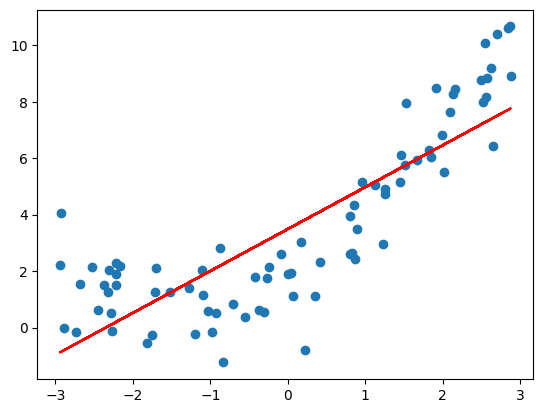

In [203]:
plt.scatter(X_train,y_train)
# prediction line will be linear 
plt.plot(X_train,model_lr.predict(X_train),color='r') # best fit line

In [204]:
# now we will do the same thing , except change the feauture value using polynomial class 

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)

In [205]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [206]:
model_lr_v2 = LinearRegression()

model_lr_v2.fit(X_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [207]:
from sklearn.metrics import r2_score
y_pred_poly = model_lr_v2.predict(X_test_poly)
score = r2_score(y_pred_poly,y_test)
print(score)

0.9033379582520188


In [208]:
print(model_lr_v2.coef_)

[[0.         1.48175703 0.51649612]]


In [209]:
print(model_lr_v2.intercept_)

[1.82480261]


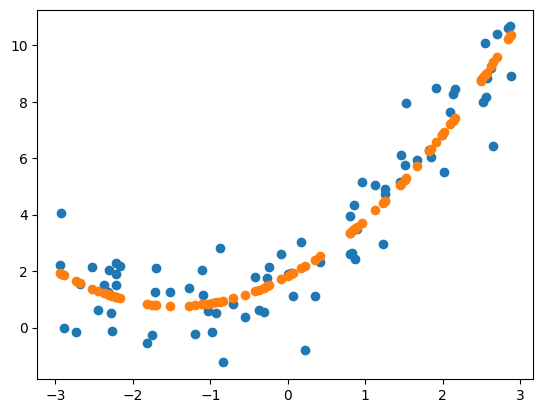

In [210]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,model_lr_v2.predict(X_train_poly))

changing the degree

In [211]:
poly2 = PolynomialFeatures(degree=3, include_bias=True)
X_train_p2 = poly2.fit_transform(X_train)
X_test_p2 = poly2.transform(X_test)

In [212]:
model3 = LinearRegression()

In [213]:
model3.fit(X_train_p2,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [214]:
score = r2_score(y_test,model3.predict(X_test_p2))
print(score)

0.925173729059045


# Pipeline Concept"

In [215]:
from sklearn.pipeline import Pipeline

In [231]:
def poly_regression(deg):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    
    poly_feature =  PolynomialFeatures(degree=deg, include_bias=True)
    lin_reg = LinearRegression()
    
    poly_regression = Pipeline([
        ("poly_feature",poly_feature),
        ('lin_reg',lin_reg)
    ])
    
    poly_regression.fit(X_train,y_train)
    y_pred_new = poly_regression.predict(X_new)
    
    plt.scatter(X_train,y_train)
    plt.plot(X_new,y_pred_new,color='r')
    


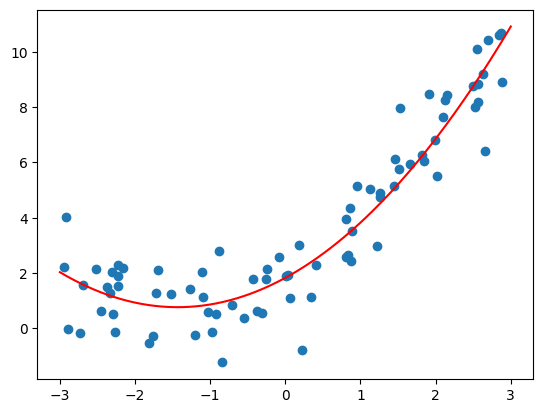

In [232]:
poly_regression(2)

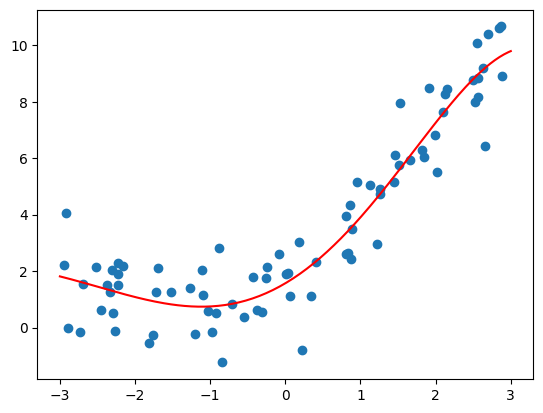

In [233]:
poly_regression(5)

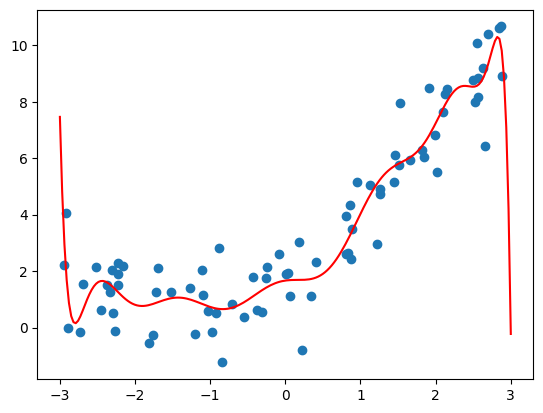

In [ ]:
poly_regression(15)
# overfitting 
